In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
PROBE_COLUMN = 0

sub = pd.read_csv('../input/lish-moa/sample_submission.csv')
print('Submission file has shape', sub.shape )
print('We will probe target',sub.columns[1+PROBE_COLUMN])

Submission file has shape (3982, 207)
We will probe target 5-alpha_reductase_inhibitor


In [2]:
sub.iloc[:,1:] = 0
sub.iloc[:,1+PROBE_COLUMN] = 1
sub.to_csv('submission_probe_%i.csv'%PROBE_COLUMN)
sub.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_001897cda,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_002429b5b,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_00276f245,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_0027f1083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
np.round( (0.29790 - 0.13073) / (-np.log(1e-15)/820292) )

3970.0

In [4]:
test_counts = pd.read_csv('../input/moa-test-target-means/target_counts.csv')
test_counts.head()

,target,train_ct,public_ct,private_ct
0,11-beta-hsd1_inhibitor,18,6,30
1,5-alpha_reductase_inhibitor,17,6,6
2,acat_inhibitor,24,6,1
3,acetylcholine_receptor_agonist,190,7,84
4,acetylcholine_receptor_antagonist,301,36,188


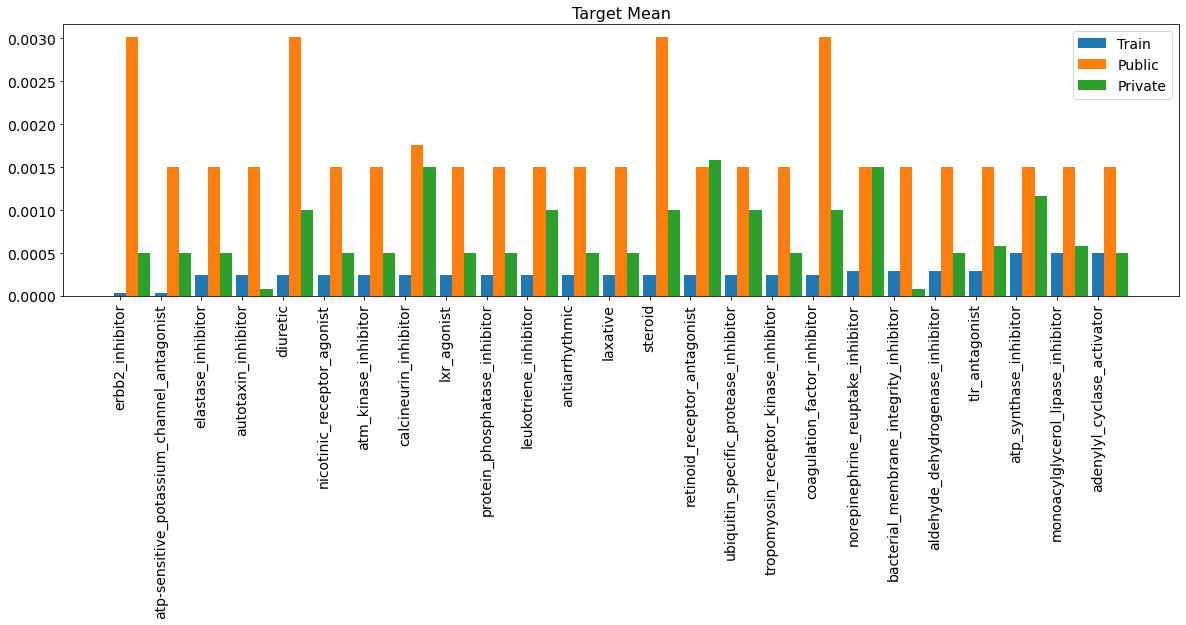

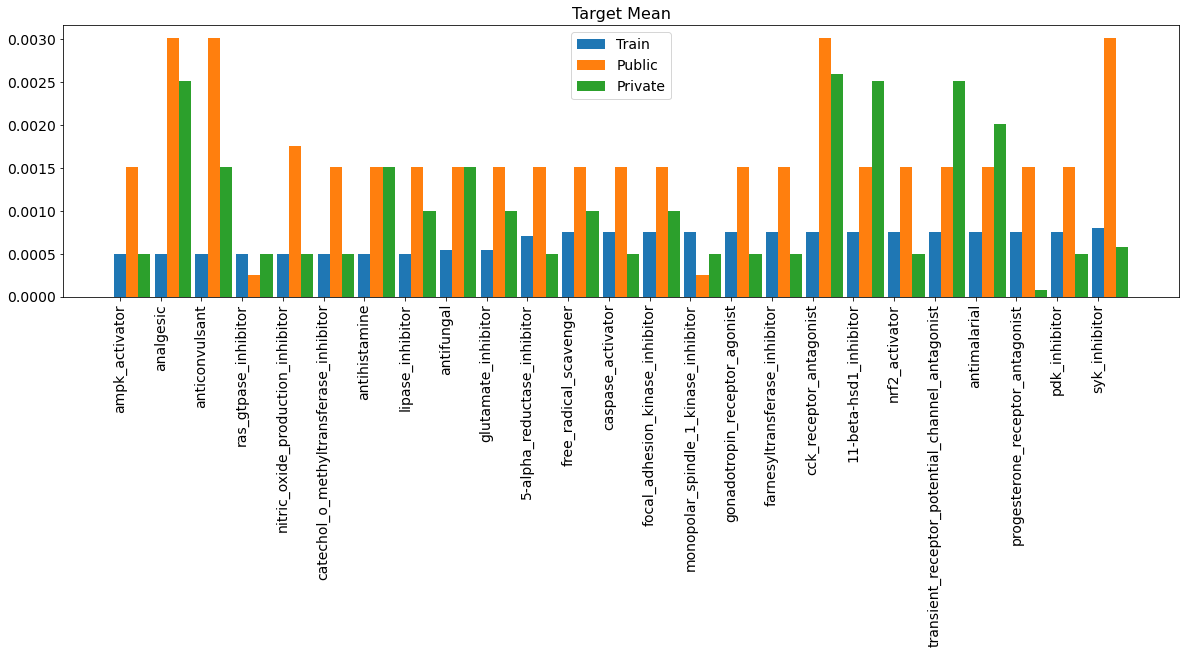

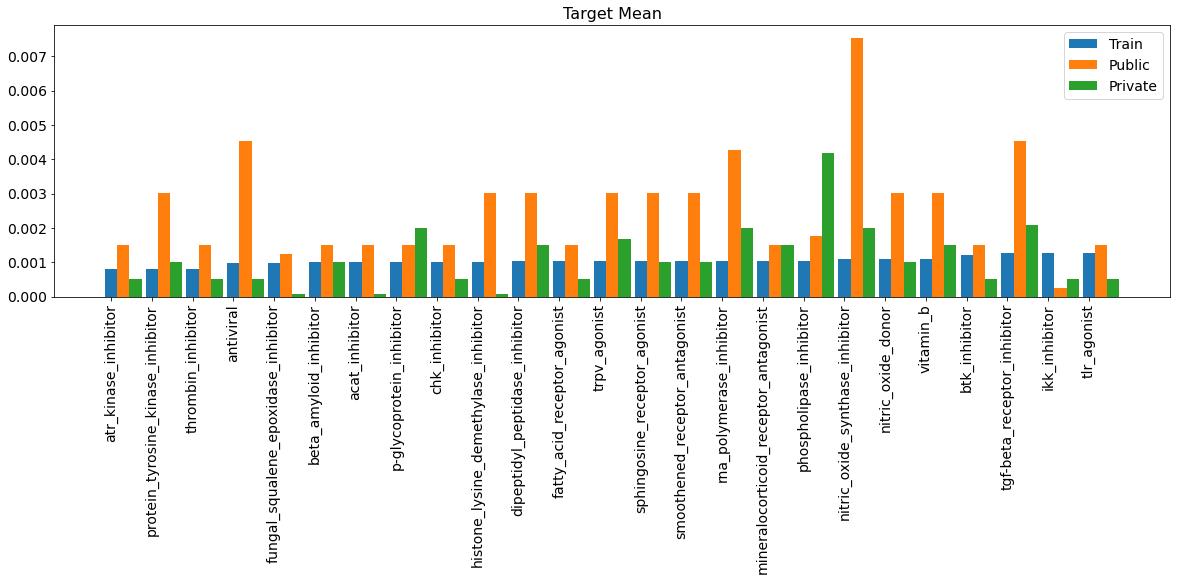

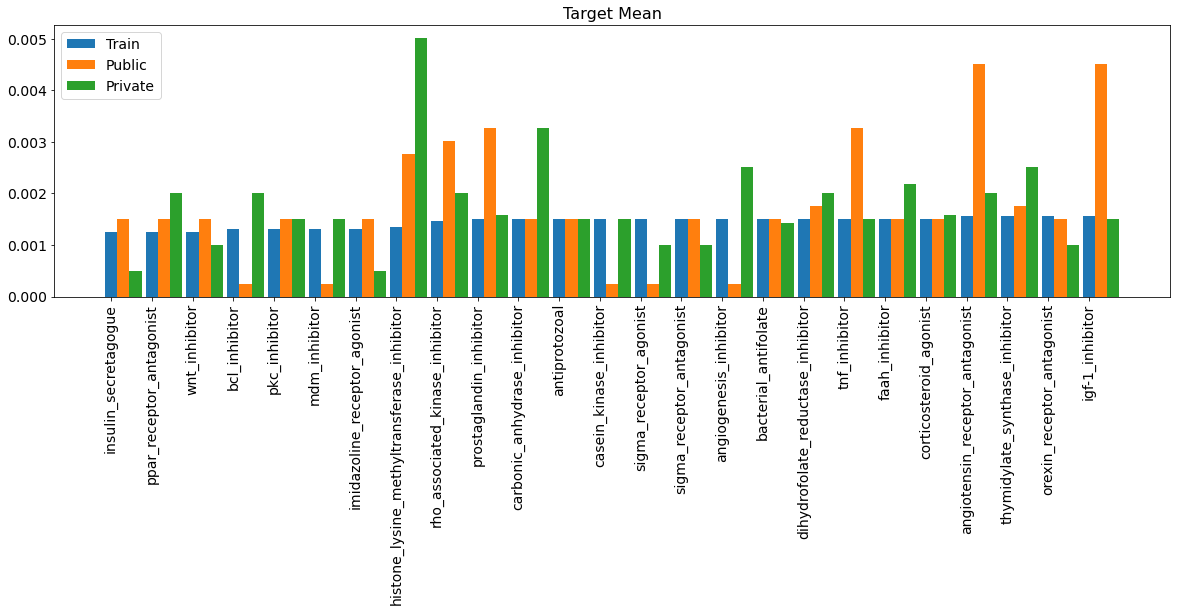

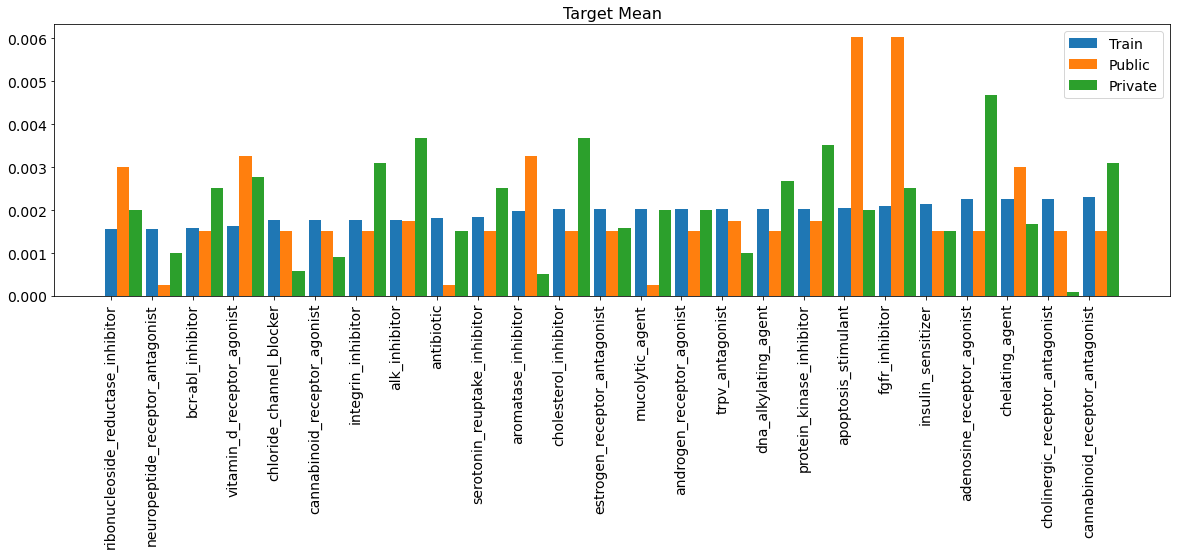

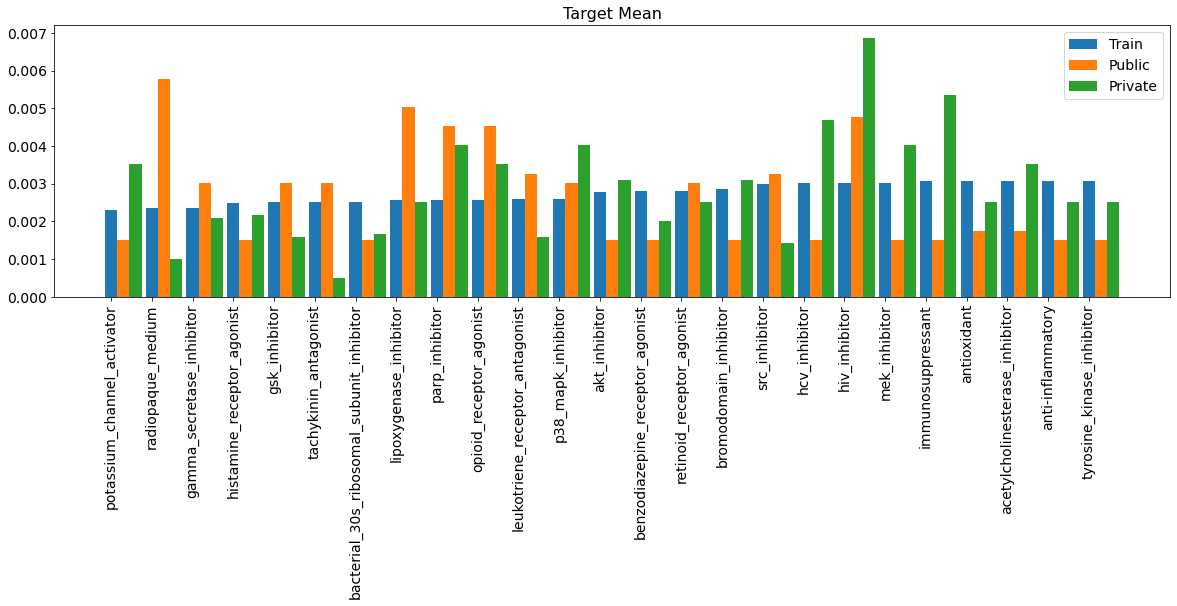

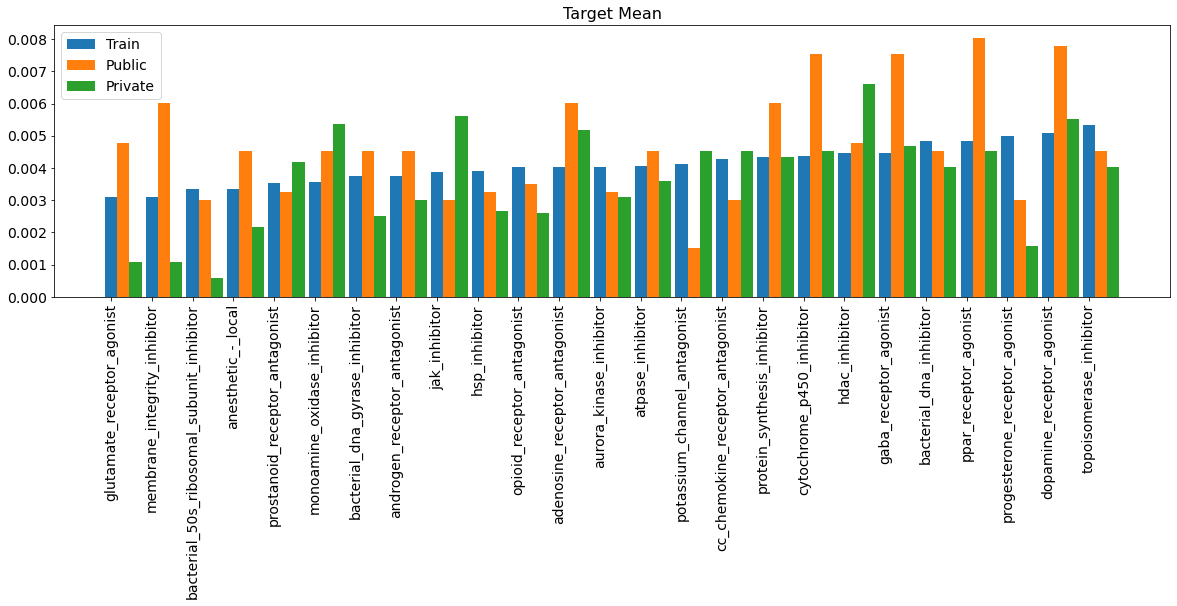

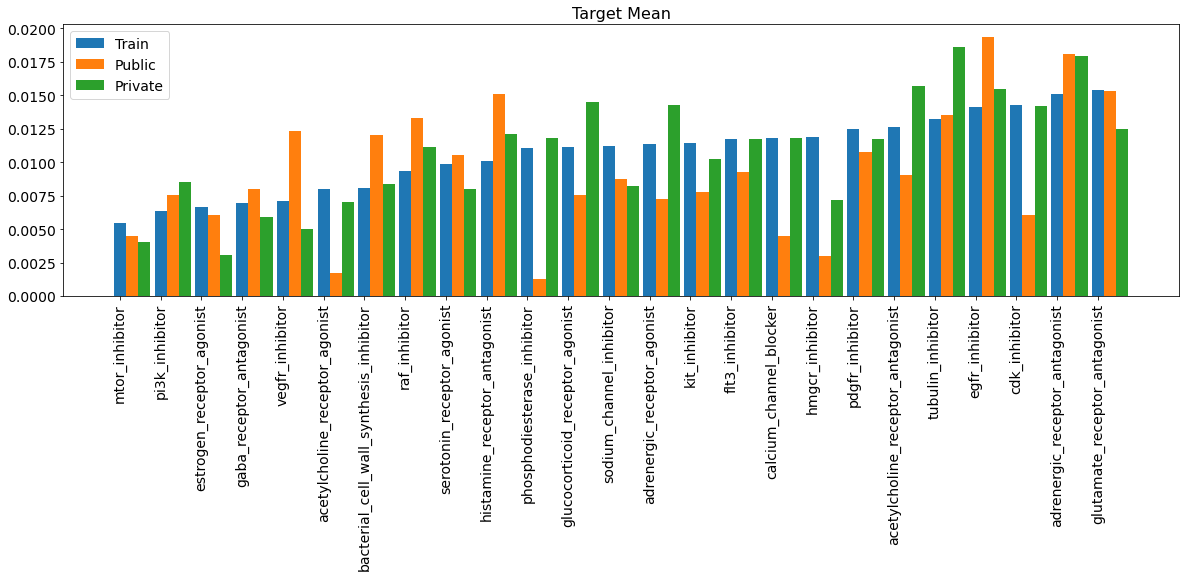

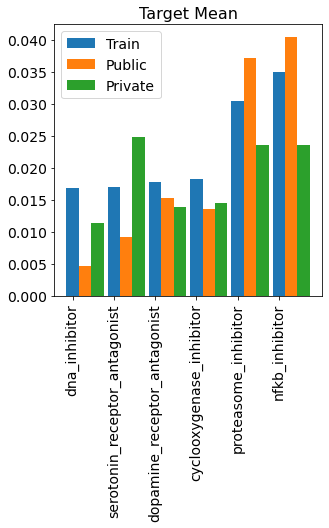

In [5]:
TRAIN_SZ = 23814
PUBLIC_SZ = 3982
PRIVATE_SZ = 3982*3

for k in range(9):
    a = 25*k; b = min(206,25*(k+1))
    df = test_counts.sort_values('train_ct').iloc[a:b].reset_index()
    plt.figure(figsize=(0.8*(b-a),5))
    plt.bar(df.index,df.train_ct/TRAIN_SZ,0.3,label='Train')
    plt.bar(df.index+0.3,df.public_ct/PUBLIC_SZ,0.3,label='Public')
    plt.bar(df.index+0.6,df.private_ct/PRIVATE_SZ,0.3,label='Private')
    plt.xticks(df.index,df.target,rotation=90, size=14)
    plt.yticks(size=14)
    plt.legend(prop={'size': 14})
    plt.title('Target Mean',size=16)
    plt.show()

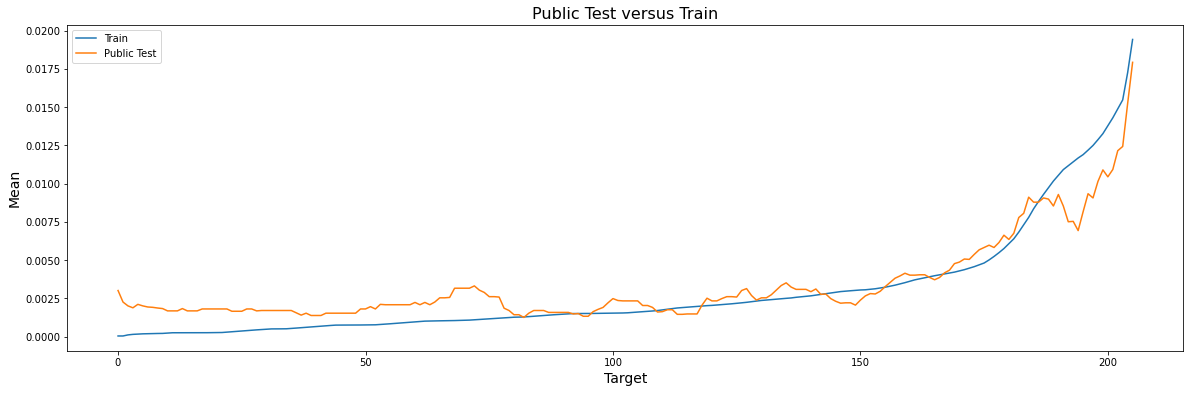

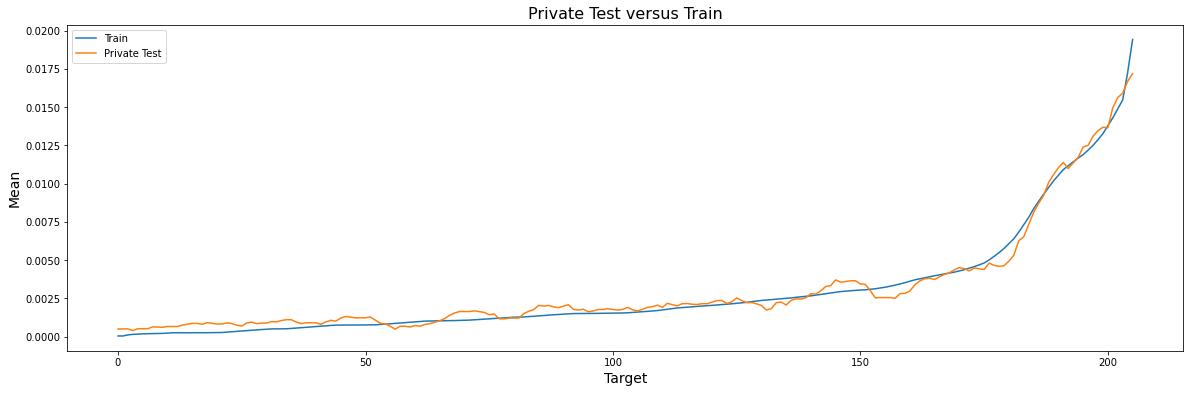

In [6]:
SMOOTH = 10
test_counts = test_counts.sort_values('train_ct').reset_index(drop=True)

plt.figure(figsize=(20,6))
plt.plot(test_counts.index,test_counts.train_ct.rolling(SMOOTH,min_periods=1).mean()/TRAIN_SZ,label='Train')
plt.plot(test_counts.index,test_counts.public_ct.rolling(SMOOTH,min_periods=1).mean()/PUBLIC_SZ,label='Public Test')
plt.title('Public Test versus Train',size=16)
plt.xlabel('Target',size=14)
plt.ylabel('Mean',size=14)
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.plot(test_counts.index,test_counts.train_ct.rolling(SMOOTH,min_periods=1).mean()/TRAIN_SZ,label='Train')
plt.plot(test_counts.index,test_counts.private_ct.rolling(SMOOTH,min_periods=1).mean()/PRIVATE_SZ,label='Private Test')
plt.title('Private Test versus Train',size=16)
plt.xlabel('Target',size=14)
plt.ylabel('Mean',size=14)
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import log_loss
train_targets = pd.read_csv('../input/lish-moa/train_targets_scored.csv')

In [8]:
# GET AN EXAMPLE OF RARE DRUG WITH 6 COUNTS
# THIS EXAMPLE HAS TARGET MEAN 0.00025
test_counts.loc[test_counts.train_ct==6].target.iloc[0]

'elastase_inhibitor'

In [9]:
log_loss( train_targets['diuretic'], np.ones(23814)*6/23814)

0.0023396682957634737

In [10]:
# GET AN EXAMPLE OF RARE DRUG WITH 36 COUNTS
# THIS EXAMPLE HAS TARGET MEAN 0.0015
test_counts.loc[test_counts.train_ct==36].target.iloc[0]

'prostaglandin_inhibitor'

In [11]:
log_loss( train_targets['casein_kinase_inhibitor'], np.ones(23814)*36/23814)

0.01132842591759234

In [12]:
# COMPUTE THE CV LB GAP
(0.01132 - 0.00234) * 60 / 206

0.0026155339805825246

In [13]:
# RUN INFERENCE FOR SAVE TABNET MODEL
! python -W ignore ../input/finalmoascripts/inference-tabnet-1830.py

# LOAD RESULT
sub = pd.read_csv('submission_tabnet_01830.csv')
test = pd.read_csv('/kaggle/input/lish-moa/test_features.csv')

/kaggle/input/moaiterative/iterative_stratification-0.1.6-py3-none-any.whl
/kaggle/input/moa-tabnet-1830/FeatureAgglomeration_c.joblib
/kaggle/input/moa-tabnet-1830/autoencode_genes_50_30_default
/kaggle/input/moa-tabnet-1830/qt.joblib
/kaggle/input/moa-tabnet-1830/FastICA_c.joblib
/kaggle/input/moa-tabnet-1830/FeatureAgglomeration_g.joblib
/kaggle/input/moa-tabnet-1830/FastICA_g.joblib
/kaggle/input/moa-tabnet-1830/pca_g.joblib
/kaggle/input/moa-tabnet-1830/autoencode_cells_50_30_default
/kaggle/input/moa-tabnet-1830/FactorAnalysis_g.joblib
/kaggle/input/moa-tabnet-1830/pca_c.joblib
/kaggle/input/moa-tabnet-1830/FactorAnalysis_c.joblib
/kaggle/input/moa-tabnet-1830/raw_step1_dae_new/tabnet_raw_step1_fold24_0/model_params.json
/kaggle/input/moa-tabnet-1830/raw_step1_dae_new/tabnet_raw_step1_fold24_0/network.pt
/kaggle/input/moa-tabnet-1830/raw_step1_dae_new/tabnet_raw_step1_fold26_0/model_params.json
/kaggle/input/moa-tabnet-1830/raw_step1_dae_new/tabnet_raw_step1_fold26_0/network.pt
/

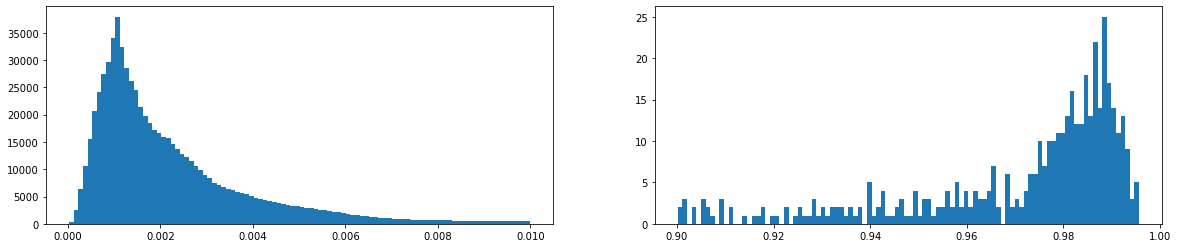

In [14]:
# PLOT PREDICTIONS
x = sub.loc[test.cp_type=='trt_cp',sub.columns[1:]].values
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

In [15]:
# CONVERT PROBABILITIES TO ODDS, APPLY MULTIPLIER, CONVERT BACK TO PROBABILITIES
def scale(x,k):
    x = x.copy()
    idx = np.where(x!=1)[0]
    y = k * x[idx] / (1-x[idx])
    x[idx] =  y/(1+y)
    return x

In [16]:
public = pd.read_csv('../input/moa-test-target-means/sample_public_submission.csv').sig_id.values
SZ = 3982; SZ2 = 3982*3

for c in test_counts.target.values:
    
    m2 = sub.loc[sub.sig_id.isin(public),c].mean()
    m3 = sub.loc[~sub.sig_id.isin(public),c].mean()
    m = test_counts.loc[test_counts.target==c,'public_ct'].values[0]/SZ /m2
    sub.loc[sub.sig_id.isin(public),c] = scale(sub.loc[sub.sig_id.isin(public),c].values,m)
    
    if len(sub)>len(public):
        
        m = test_counts.loc[test_counts.target==c,'private_ct'].values[0]/SZ2 /m3
        sub.loc[~sub.sig_id.isin(public),c] = scale(sub.loc[~sub.sig_id.isin(public),c].values,m)
                    
print('Updated',len(test_counts),'targets')

Updated 206 targets


In [17]:
# SAVE SUBMISSION FILE
s = sub.loc[(test.cp_type=='ctl_vehicle').values].mean().sum()
print('Control rows in submission have mean = %i'%s)

sub.to_csv('submission.csv',index=False)
sub.head()

Control rows in submission have mean = 0


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.001874,0.001990,0.002402,0.003344,0.013811,0.002392,0.001814,0.009676,0.000925,...,0.002067,0.003507,0.002908,0.001444,0.000535,0.001839,0.002127,0.004089,0.006756,0.002000
1,id_001897cda,0.001264,0.001754,0.002706,0.000722,0.001542,0.001120,0.002203,0.017525,0.005436,...,0.002130,0.002552,0.003939,0.000821,0.002247,0.001795,0.014764,0.002987,0.003172,0.002677
2,id_002429b5b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,id_00276f245,0.001771,0.001610,0.001755,0.002504,0.013418,0.002423,0.001899,0.006006,0.000709,...,0.001784,0.003589,0.001839,0.014296,0.001720,0.001648,0.002458,0.004098,0.000783,0.001628
4,id_0027f1083,0.001821,0.001966,0.001973,0.002683,0.010821,0.002318,0.001909,0.003943,0.000951,...,0.001962,0.002347,0.002089,0.002609,0.000857,0.001950,0.002255,0.004043,0.000951,0.001751
